In [14]:
from functools import reduce


a = [1,2,3,4,5]
b = []
for i in a:
    x = i * 2
    b.append(x)
# print(b)

def square(x):
    return x*2

def multi(x):
    return x*x

# c = map(map(multi, a))
c = map(lambda x : x*2, a)
# print(list(c))

d = list(range(101))

def add(a,b):
    return a+b

# e = reduce(add, d)
# print(e)
e = reduce(lambda x,y : x + y , d)

f = list(range(11))
g = []

h = filter(lambda x : x % 2 == 0, f)
print(list(h))



[0, 2, 4, 6, 8, 10]


In [39]:
import numpy as np
import pandas as pd
import tensorflow as tf

csv = pd.read_csv("datasets/bmi.csv")
print(csv)

bclass = {"thin":[1,0,0], "normal":[0,1,0], "fat":[0,0,1] }
csv["label_pat"] = csv["label"].apply(lambda x:np.array(bclass[x]))
test_csv = csv[15000:20000]
test_pat = test_csv[["weight","height"]]
test_ans = list(test_csv["label_pat"])
x = tf.placeholder(tf.float32, [None, 2])
y_ = tf.placeholder(tf.float32, [None, 3])
W = tf.Variable(tf.zeros([2,3]))
b = tf.Variable(tf.zeros([3]))
y = tf.nn.softmax(tf.matmul(x, W) + b)
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(cross_entropy)
predict = tf.equal(tf.argmax(y,1), tf.argmax(y_ , 1))
accuracy = tf.reduce_mean(tf.cast(predict, tf.float32))
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(3500):
    i = (step * 100) % 14000
    rows = csv[1 + i : 1 + i + 100]
    x_pat = rows[["weight", "height"]]
    y_ans = list(rows["label_pat"])
    fd = {x:x_pat, y_:y_ans}
    sess.run(train, feed_dict = fd)
    if step % 500 == 0:
        cre = sess.run(cross_entropy, feed_dict=fd)
        acc = sess.run(accuracy, feed_dict={x:test_pat, y_:test_ans})
        print("step=",step, "cre=", cre, "acc=",acc)
        
acc = sess.run(accuracy, feed_dict={x:test_pat, y_:test_ans})
print("정답율=",acc)
        
# opti

       height  weight   label
0         148      43  normal
1         151      75     fat
2         159      60  normal
3         180      74  normal
4         157      58  normal
5         184      79  normal
6         147      79     fat
7         145      72     fat
8         183      51    thin
9         188      73  normal
10        191      78  normal
11        152      39    thin
12        128      52     fat
13        166      62  normal
14        153      62     fat
15        162      63  normal
16        130      57     fat
17        149      35    thin
18        127      40  normal
19        127      65     fat
20        130      73     fat
21        136      63     fat
22        192      63    thin
23        155      65     fat
24        183      73  normal
25        171      51    thin
26        138      78     fat
27        166      62  normal
28        160      66     fat
29        147      78     fat
...       ...     ...     ...
19970     175      45    thin
19971     

In [33]:
import numpy as np
import tensorflow as tf

a = tf.constant(np.array([[.1, .3, .5, .7, .9]]))
sess = tf.Session()
print(sess.run(tf.nn.softmax(a)))


[[0.12885125 0.15737927 0.19222347 0.23478228 0.28676373]]


Using TensorFlow backend.


(50, 5)
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 11]
 [ 9 10 11 11  4]
 [10 11 11  4 11]
 [11 11  4 11  9]
 [11  4 11  9  9]
 [ 4 11  9  9  9]
 [11  9  9  9 10]
 [ 9  9  9 10  8]
 [ 9  9 10  8  1]
 [ 9 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]
 [11  9  9  2  8]
 [ 9  9  2  8  8]
 [ 9  2  8  8  8]
 [ 2  8  8  8  8]
 [ 8  8  8  8  8]
 [ 8  8  8  8  9]
 [ 8  8  8  9  3]
 [ 8  8  9  3  9]
 [ 8  9  3  9  9]
 [ 9  3  9  9  9]
 [ 3  9  9  9  9]
 [ 9  9  9  9  9]
 [ 9  9  9  9 10]
 [ 9  9  9 10  4]
 [ 9  9 10  4 11]
 [ 9 10  4 11  9]
 [10  4 11  9  2]
 [ 4 11  9  2 10]
 [11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]]
one hot encoding vector size is  12
Epoch 1/2000
 - 0s - loss: 2.4733 - acc: 0.1800
Epoch 2

Epoch 149/2000
 - 0s - loss: 1.3040 - acc: 0.5200
Epoch 150/2000
 - 0s - loss: 1.3020 - acc: 0.5600
Epoch 151/2000
 - 0s - loss: 1.2995 - acc: 0.5600
Epoch 152/2000
 - 0s - loss: 1.2961 - acc: 0.5600
Epoch 153/2000
 - 0s - loss: 1.2949 - acc: 0.5600
Epoch 154/2000
 - 0s - loss: 1.2931 - acc: 0.5400
Epoch 155/2000
 - 0s - loss: 1.3042 - acc: 0.5600
Epoch 156/2000
 - 0s - loss: 1.2860 - acc: 0.5600
Epoch 157/2000
 - 0s - loss: 1.2972 - acc: 0.5600
Epoch 158/2000
 - 0s - loss: 1.2886 - acc: 0.5400
Epoch 159/2000
 - 0s - loss: 1.2821 - acc: 0.5400
Epoch 160/2000
 - 0s - loss: 1.2765 - acc: 0.5400
Epoch 161/2000
 - 0s - loss: 1.2858 - acc: 0.5400
Epoch 162/2000
 - 0s - loss: 1.2762 - acc: 0.5400
Epoch 163/2000
 - 0s - loss: 1.2767 - acc: 0.5600
Epoch 164/2000
 - 0s - loss: 1.2763 - acc: 0.5600
Epoch 165/2000
 - 0s - loss: 1.2731 - acc: 0.5400
Epoch 166/2000
 - 0s - loss: 1.2685 - acc: 0.5400
Epoch 167/2000
 - 0s - loss: 1.2644 - acc: 0.5400
Epoch 168/2000
 - 0s - loss: 1.2674 - acc: 0.5400


Epoch 313/2000
 - 0s - loss: 1.0341 - acc: 0.5800
Epoch 314/2000
 - 0s - loss: 1.0280 - acc: 0.5400
Epoch 315/2000
 - 0s - loss: 1.0253 - acc: 0.5800
Epoch 316/2000
 - 0s - loss: 1.0304 - acc: 0.6000
Epoch 317/2000
 - 0s - loss: 1.0282 - acc: 0.6000
Epoch 318/2000
 - 0s - loss: 1.0235 - acc: 0.5800
Epoch 319/2000
 - 0s - loss: 1.0306 - acc: 0.5600
Epoch 320/2000
 - 0s - loss: 1.0263 - acc: 0.5800
Epoch 321/2000
 - 0s - loss: 1.0183 - acc: 0.5800
Epoch 322/2000
 - 0s - loss: 1.0189 - acc: 0.5400
Epoch 323/2000
 - 0s - loss: 1.0186 - acc: 0.5400
Epoch 324/2000
 - 0s - loss: 1.0230 - acc: 0.5800
Epoch 325/2000
 - 0s - loss: 1.0176 - acc: 0.6000
Epoch 326/2000
 - 0s - loss: 1.0151 - acc: 0.5400
Epoch 327/2000
 - 0s - loss: 1.0139 - acc: 0.5400
Epoch 328/2000
 - 0s - loss: 1.0203 - acc: 0.6000
Epoch 329/2000
 - 0s - loss: 1.0141 - acc: 0.5800
Epoch 330/2000
 - 0s - loss: 1.0177 - acc: 0.5800
Epoch 331/2000
 - 0s - loss: 1.0148 - acc: 0.5400
Epoch 332/2000
 - 0s - loss: 1.0125 - acc: 0.5600


Epoch 477/2000
 - 0s - loss: 0.8920 - acc: 0.6600
Epoch 478/2000
 - 0s - loss: 0.8767 - acc: 0.7000
Epoch 479/2000
 - 0s - loss: 0.8802 - acc: 0.6400
Epoch 480/2000
 - 0s - loss: 0.8728 - acc: 0.6800
Epoch 481/2000
 - 0s - loss: 0.8718 - acc: 0.6800
Epoch 482/2000
 - 0s - loss: 0.8801 - acc: 0.6200
Epoch 483/2000
 - 0s - loss: 0.8781 - acc: 0.6600
Epoch 484/2000
 - 0s - loss: 0.8746 - acc: 0.7000
Epoch 485/2000
 - 0s - loss: 0.8862 - acc: 0.6600
Epoch 486/2000
 - 0s - loss: 0.8728 - acc: 0.6800
Epoch 487/2000
 - 0s - loss: 0.8809 - acc: 0.6600
Epoch 488/2000
 - 0s - loss: 0.8772 - acc: 0.6800
Epoch 489/2000
 - 0s - loss: 0.8721 - acc: 0.6800
Epoch 490/2000
 - 0s - loss: 0.8759 - acc: 0.6600
Epoch 491/2000
 - 0s - loss: 0.8693 - acc: 0.6600
Epoch 492/2000
 - 0s - loss: 0.8682 - acc: 0.6600
Epoch 493/2000
 - 0s - loss: 0.8618 - acc: 0.6600
Epoch 494/2000
 - 0s - loss: 0.8633 - acc: 0.6600
Epoch 495/2000
 - 0s - loss: 0.8759 - acc: 0.6600
Epoch 496/2000
 - 0s - loss: 0.8673 - acc: 0.6600


Epoch 641/2000
 - 0s - loss: 0.7609 - acc: 0.7200
Epoch 642/2000
 - 0s - loss: 0.7579 - acc: 0.7000
Epoch 643/2000
 - 0s - loss: 0.7563 - acc: 0.7000
Epoch 644/2000
 - 0s - loss: 0.7502 - acc: 0.7200
Epoch 645/2000
 - 0s - loss: 0.7492 - acc: 0.7400
Epoch 646/2000
 - 0s - loss: 0.7489 - acc: 0.7200
Epoch 647/2000
 - 0s - loss: 0.7524 - acc: 0.7400
Epoch 648/2000
 - 0s - loss: 0.7617 - acc: 0.7000
Epoch 649/2000
 - 0s - loss: 0.7509 - acc: 0.7200
Epoch 650/2000
 - 0s - loss: 0.7504 - acc: 0.7200
Epoch 651/2000
 - 0s - loss: 0.7449 - acc: 0.7200
Epoch 652/2000
 - 0s - loss: 0.7475 - acc: 0.7000
Epoch 653/2000
 - 0s - loss: 0.7421 - acc: 0.6800
Epoch 654/2000
 - 0s - loss: 0.7401 - acc: 0.6800
Epoch 655/2000
 - 0s - loss: 0.7428 - acc: 0.7200
Epoch 656/2000
 - 0s - loss: 0.7510 - acc: 0.7200
Epoch 657/2000
 - 0s - loss: 0.7438 - acc: 0.7200
Epoch 658/2000
 - 0s - loss: 0.7468 - acc: 0.6800
Epoch 659/2000
 - 0s - loss: 0.7543 - acc: 0.7400
Epoch 660/2000
 - 0s - loss: 0.7396 - acc: 0.7200


Epoch 805/2000
 - 0s - loss: 0.6517 - acc: 0.7200
Epoch 806/2000
 - 0s - loss: 0.6530 - acc: 0.7400
Epoch 807/2000
 - 0s - loss: 0.6419 - acc: 0.8000
Epoch 808/2000
 - 0s - loss: 0.6462 - acc: 0.7800
Epoch 809/2000
 - 0s - loss: 0.6504 - acc: 0.7800
Epoch 810/2000
 - 0s - loss: 0.6469 - acc: 0.7600
Epoch 811/2000
 - 0s - loss: 0.6444 - acc: 0.7600
Epoch 812/2000
 - 0s - loss: 0.6396 - acc: 0.7600
Epoch 813/2000
 - 0s - loss: 0.6528 - acc: 0.7600
Epoch 814/2000
 - 0s - loss: 0.6390 - acc: 0.8200
Epoch 815/2000
 - 0s - loss: 0.6355 - acc: 0.8200
Epoch 816/2000
 - 0s - loss: 0.6430 - acc: 0.7800
Epoch 817/2000
 - 0s - loss: 0.6443 - acc: 0.7400
Epoch 818/2000
 - 0s - loss: 0.6388 - acc: 0.7800
Epoch 819/2000
 - 0s - loss: 0.6424 - acc: 0.8000
Epoch 820/2000
 - 0s - loss: 0.6330 - acc: 0.7800
Epoch 821/2000
 - 0s - loss: 0.6312 - acc: 0.7800
Epoch 822/2000
 - 0s - loss: 0.6309 - acc: 0.8000
Epoch 823/2000
 - 0s - loss: 0.6339 - acc: 0.7800
Epoch 824/2000
 - 0s - loss: 0.6332 - acc: 0.7600


Epoch 969/2000
 - 0s - loss: 0.5386 - acc: 0.8200
Epoch 970/2000
 - 0s - loss: 0.5384 - acc: 0.8200
Epoch 971/2000
 - 0s - loss: 0.5342 - acc: 0.8200
Epoch 972/2000
 - 0s - loss: 0.5384 - acc: 0.8200
Epoch 973/2000
 - 0s - loss: 0.5413 - acc: 0.8400
Epoch 974/2000
 - 0s - loss: 0.5355 - acc: 0.8400
Epoch 975/2000
 - 0s - loss: 0.5353 - acc: 0.8400
Epoch 976/2000
 - 0s - loss: 0.5514 - acc: 0.8000
Epoch 977/2000
 - 0s - loss: 0.5466 - acc: 0.8200
Epoch 978/2000
 - 0s - loss: 0.5379 - acc: 0.8400
Epoch 979/2000
 - 0s - loss: 0.5515 - acc: 0.8200
Epoch 980/2000
 - 0s - loss: 0.5419 - acc: 0.8400
Epoch 981/2000
 - 0s - loss: 0.5385 - acc: 0.8000
Epoch 982/2000
 - 0s - loss: 0.5465 - acc: 0.8200
Epoch 983/2000
 - 0s - loss: 0.5381 - acc: 0.8400
Epoch 984/2000
 - 0s - loss: 0.5440 - acc: 0.8000
Epoch 985/2000
 - 0s - loss: 0.5366 - acc: 0.8000
Epoch 986/2000
 - 0s - loss: 0.5341 - acc: 0.8000
Epoch 987/2000
 - 0s - loss: 0.5344 - acc: 0.8400
Epoch 988/2000
 - 0s - loss: 0.5378 - acc: 0.8200


Epoch 1131/2000
 - 0s - loss: 0.4458 - acc: 0.9000
Epoch 1132/2000
 - 0s - loss: 0.4597 - acc: 0.8800
Epoch 1133/2000
 - 0s - loss: 0.4461 - acc: 0.9000
Epoch 1134/2000
 - 0s - loss: 0.4505 - acc: 0.8800
Epoch 1135/2000
 - 0s - loss: 0.4611 - acc: 0.8600
Epoch 1136/2000
 - 0s - loss: 0.4615 - acc: 0.9400
Epoch 1137/2000
 - 0s - loss: 0.4513 - acc: 0.9000
Epoch 1138/2000
 - 0s - loss: 0.4601 - acc: 0.9000
Epoch 1139/2000
 - 0s - loss: 0.4519 - acc: 0.8800
Epoch 1140/2000
 - 0s - loss: 0.4759 - acc: 0.8200
Epoch 1141/2000
 - 0s - loss: 0.4578 - acc: 0.8800
Epoch 1142/2000
 - 0s - loss: 0.4426 - acc: 0.8600
Epoch 1143/2000
 - 0s - loss: 0.4518 - acc: 0.9000
Epoch 1144/2000
 - 0s - loss: 0.4529 - acc: 0.9200
Epoch 1145/2000
 - 0s - loss: 0.4568 - acc: 0.8600
Epoch 1146/2000
 - 0s - loss: 0.4422 - acc: 0.8800
Epoch 1147/2000
 - 0s - loss: 0.4609 - acc: 0.8600
Epoch 1148/2000
 - 0s - loss: 0.4531 - acc: 0.9000
Epoch 1149/2000
 - 0s - loss: 0.4510 - acc: 0.8800
Epoch 1150/2000
 - 0s - loss: 0

Epoch 1292/2000
 - 0s - loss: 0.3774 - acc: 0.9200
Epoch 1293/2000
 - 0s - loss: 0.3836 - acc: 0.9200
Epoch 1294/2000
 - 0s - loss: 0.3817 - acc: 0.9200
Epoch 1295/2000
 - 0s - loss: 0.3742 - acc: 0.9200
Epoch 1296/2000
 - 0s - loss: 0.3847 - acc: 0.9200
Epoch 1297/2000
 - 0s - loss: 0.3843 - acc: 0.9200
Epoch 1298/2000
 - 0s - loss: 0.3887 - acc: 0.9200
Epoch 1299/2000
 - 0s - loss: 0.3766 - acc: 0.9000
Epoch 1300/2000
 - 0s - loss: 0.3653 - acc: 0.9200
Epoch 1301/2000
 - 0s - loss: 0.3769 - acc: 0.9000
Epoch 1302/2000
 - 0s - loss: 0.3807 - acc: 0.9200
Epoch 1303/2000
 - 0s - loss: 0.3705 - acc: 0.9000
Epoch 1304/2000
 - 0s - loss: 0.3720 - acc: 0.9200
Epoch 1305/2000
 - 0s - loss: 0.3743 - acc: 0.9200
Epoch 1306/2000
 - 0s - loss: 0.3716 - acc: 0.8800
Epoch 1307/2000
 - 0s - loss: 0.3707 - acc: 0.9200
Epoch 1308/2000
 - 0s - loss: 0.3785 - acc: 0.9200
Epoch 1309/2000
 - 0s - loss: 0.3682 - acc: 0.9200
Epoch 1310/2000
 - 0s - loss: 0.3736 - acc: 0.9200
Epoch 1311/2000
 - 0s - loss: 0

Epoch 1453/2000
 - 0s - loss: 0.3247 - acc: 0.9200
Epoch 1454/2000
 - 0s - loss: 0.3222 - acc: 0.9200
Epoch 1455/2000
 - 0s - loss: 0.3213 - acc: 0.9200
Epoch 1456/2000
 - 0s - loss: 0.3174 - acc: 0.9200
Epoch 1457/2000
 - 0s - loss: 0.3196 - acc: 0.9200
Epoch 1458/2000
 - 0s - loss: 0.3170 - acc: 0.9200
Epoch 1459/2000
 - 0s - loss: 0.3164 - acc: 0.9200
Epoch 1460/2000
 - 0s - loss: 0.3217 - acc: 0.9200
Epoch 1461/2000
 - 0s - loss: 0.3253 - acc: 0.9200
Epoch 1462/2000
 - 0s - loss: 0.3304 - acc: 0.9200
Epoch 1463/2000
 - 0s - loss: 0.3264 - acc: 0.9200
Epoch 1464/2000
 - 0s - loss: 0.3300 - acc: 0.9200
Epoch 1465/2000
 - 0s - loss: 0.3213 - acc: 0.9200
Epoch 1466/2000
 - 0s - loss: 0.3126 - acc: 0.9200
Epoch 1467/2000
 - 0s - loss: 0.3142 - acc: 0.9200
Epoch 1468/2000
 - 0s - loss: 0.3187 - acc: 0.9200
Epoch 1469/2000
 - 0s - loss: 0.3325 - acc: 0.9000
Epoch 1470/2000
 - 0s - loss: 0.3157 - acc: 0.9200
Epoch 1471/2000
 - 0s - loss: 0.3149 - acc: 0.9200
Epoch 1472/2000
 - 0s - loss: 0

Epoch 1614/2000
 - 0s - loss: 0.2786 - acc: 0.9200
Epoch 1615/2000
 - 0s - loss: 0.2731 - acc: 0.9200
Epoch 1616/2000
 - 0s - loss: 0.2773 - acc: 0.9200
Epoch 1617/2000
 - 0s - loss: 0.2799 - acc: 0.9200
Epoch 1618/2000
 - 0s - loss: 0.2833 - acc: 0.9200
Epoch 1619/2000
 - 0s - loss: 0.2780 - acc: 0.9200
Epoch 1620/2000
 - 0s - loss: 0.2744 - acc: 0.9200
Epoch 1621/2000
 - 0s - loss: 0.2842 - acc: 0.9000
Epoch 1622/2000
 - 0s - loss: 0.2774 - acc: 0.9200
Epoch 1623/2000
 - 0s - loss: 0.2723 - acc: 0.9200
Epoch 1624/2000
 - 0s - loss: 0.2893 - acc: 0.9200
Epoch 1625/2000
 - 0s - loss: 0.2769 - acc: 0.9200
Epoch 1626/2000
 - 0s - loss: 0.2777 - acc: 0.9200
Epoch 1627/2000
 - 0s - loss: 0.2721 - acc: 0.9200
Epoch 1628/2000
 - 0s - loss: 0.2863 - acc: 0.9000
Epoch 1629/2000
 - 0s - loss: 0.3073 - acc: 0.9200
Epoch 1630/2000
 - 0s - loss: 0.2794 - acc: 0.9200
Epoch 1631/2000
 - 0s - loss: 0.2916 - acc: 0.9000
Epoch 1632/2000
 - 0s - loss: 0.2728 - acc: 0.9400
Epoch 1633/2000
 - 0s - loss: 0

Epoch 1775/2000
 - 0s - loss: 0.2433 - acc: 0.9000
Epoch 1776/2000
 - 0s - loss: 0.2460 - acc: 0.9200
Epoch 1777/2000
 - 0s - loss: 0.2416 - acc: 0.9200
Epoch 1778/2000
 - 0s - loss: 0.2415 - acc: 0.9200
Epoch 1779/2000
 - 0s - loss: 0.2399 - acc: 0.9200
Epoch 1780/2000
 - 0s - loss: 0.2419 - acc: 0.9200
Epoch 1781/2000
 - 0s - loss: 0.2437 - acc: 0.9200
Epoch 1782/2000
 - 0s - loss: 0.2452 - acc: 0.9200
Epoch 1783/2000
 - 0s - loss: 0.2402 - acc: 0.9400
Epoch 1784/2000
 - 0s - loss: 0.2432 - acc: 0.9200
Epoch 1785/2000
 - 0s - loss: 0.2499 - acc: 0.9200
Epoch 1786/2000
 - 0s - loss: 0.2438 - acc: 0.9200
Epoch 1787/2000
 - 0s - loss: 0.2524 - acc: 0.9200
Epoch 1788/2000
 - 0s - loss: 0.2440 - acc: 0.9000
Epoch 1789/2000
 - 0s - loss: 0.2431 - acc: 0.9200
Epoch 1790/2000
 - 0s - loss: 0.2489 - acc: 0.9200
Epoch 1791/2000
 - 0s - loss: 0.2520 - acc: 0.9000
Epoch 1792/2000
 - 0s - loss: 0.2467 - acc: 0.9200
Epoch 1793/2000
 - 0s - loss: 0.2432 - acc: 0.9200
Epoch 1794/2000
 - 0s - loss: 0

Epoch 1936/2000
 - 0s - loss: 0.2171 - acc: 0.9200
Epoch 1937/2000
 - 0s - loss: 0.2251 - acc: 0.9200
Epoch 1938/2000
 - 0s - loss: 0.2280 - acc: 0.9200
Epoch 1939/2000
 - 0s - loss: 0.2228 - acc: 0.9000
Epoch 1940/2000
 - 0s - loss: 0.2264 - acc: 0.9200
Epoch 1941/2000
 - 0s - loss: 0.2197 - acc: 0.9200
Epoch 1942/2000
 - 0s - loss: 0.2285 - acc: 0.9200
Epoch 1943/2000
 - 0s - loss: 0.2142 - acc: 0.9200
Epoch 1944/2000
 - 0s - loss: 0.2283 - acc: 0.9200
Epoch 1945/2000
 - 0s - loss: 0.2258 - acc: 0.9000
Epoch 1946/2000
 - 0s - loss: 0.2255 - acc: 0.9200
Epoch 1947/2000
 - 0s - loss: 0.2324 - acc: 0.9000
Epoch 1948/2000
 - 0s - loss: 0.2262 - acc: 0.9200
Epoch 1949/2000
 - 0s - loss: 0.2392 - acc: 0.9200
Epoch 1950/2000
 - 0s - loss: 0.2439 - acc: 0.9000
Epoch 1951/2000
 - 0s - loss: 0.2172 - acc: 0.9200
Epoch 1952/2000
 - 0s - loss: 0.2218 - acc: 0.9000
Epoch 1953/2000
 - 0s - loss: 0.2211 - acc: 0.9000
Epoch 1954/2000
 - 0s - loss: 0.2210 - acc: 0.9200
Epoch 1955/2000
 - 0s - loss: 0

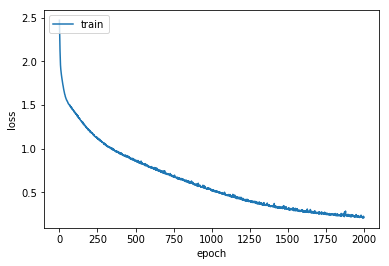

50/50 [==============================] - 0s 987us/step
acc: 92.00%
one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8']


In [35]:
# 0. 사용할 패키지 불러오기
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수        
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

# 1. 데이터 준비하기

# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

# 2. 데이터셋 생성하기
dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)
print(dataset)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

# 3. 모델 구성하기
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(one_hot_vec_size, activation='softmax'))

# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = LossHistory() # 손실 이력 객체 생성
history.init()

# 5. 모델 학습시키기
model.fit(x_train, y_train, epochs=2000, batch_size=10, verbose=2, callbacks=[history])
    
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4)) # batch_size, feature
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

In [41]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float')
X_train /= 255
X_test /= 255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist = model.fit(X_train, y_train)
score = model.evaluate(X_test, y_test)
print('loss=',score[0])
print('accuracy=',score[1])



Epoch 1/1
10000/10000 [==============================] - 1s 58us/step
loss= 0.11371283216755837
accuracy= 0.9639
